In [7]:
execfile("database.py")

Creating Database
Connecting to Database
Creating Crime Table
Creating shape table...
Creating Crime Geom Table


In [48]:
import psycopg2
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [334]:
conn = psycopg2.connect("dbname=oakland user=danaezoule")
cur = conn.cursor()
cur.execute("SELECT * FROM crime_blocks;")
df = pd.DataFrame(cur.fetchall())

In [390]:
cdf = df.copy()

In [391]:
cdf.columns = ['Idx', 'OPD_RD', 'Date', 'Time', 'Lat', 'Lng', 'year', 'year_month', 'quality', 'nonviolent', 'car_break_in', 'car_theft', 'violent', 'geom', 'block_group']
cdf['quarter'] = pd.DatetimeIndex(cdf.Date).quarter
cdf['day_of_week'] = pd.DatetimeIndex(cdf.Date).dayofweek
cdf['week'] = pd.DatetimeIndex(cdf.Date).week
cdf['month'] = pd.DatetimeIndex(cdf.Date).month
cdf['day'] = pd.DatetimeIndex(cdf.Date).day
cdf['day_of_year'] = pd.DatetimeIndex(cdf.Date).dayofyear
cdf['week_of_year'] = pd.DatetimeIndex(cdf.Date).weekofyear
cdf['hour'] = [i.hour for i in cdf.Time]
#combine date and time column so I can plot over 'em
cdf['Datetime'] = pd.to_datetime(cdf['Date'].astype(str) + ' ' + cdf['Time'].astype(str))

In [352]:
def crime_plt(block, years, quarters, groupby='hour'):
    test_block_quarter = cdf[cdf.year.isin(years)][cdf.quarter.isin(quarters)]
    #test_block_quarter = test_block_quarter[['Datetime','day_of_week','hour','quality','nonviolent','car_break_in','car_theft','violent']]
    test_block_quarter[test_block_quarter.quality == 1].groupby(groupby).Datetime.count().plot(title = "crime")

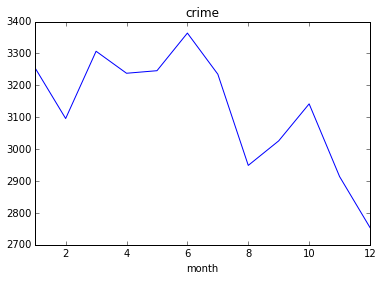

In [378]:
crime_plt([23124], [2009, 2010, 2011, 2012, 2013, 2014], [1, 2, 3, 4], 'month')

# plot years/quarters over each other
# plot different crime types on one graph
# remove or normalize 0 hour data (sigh)

In [ ]:
def crime_plt(block, years, quarters, groupby='hour'):
    test_block_quarter = cdf[cdf.year.isin(years)][cdf.quarter.isin(quarters)]
    #test_block_quarter = test_block_quarter[['Datetime','day_of_week','hour','quality','nonviolent','car_break_in','car_theft','violent']]
    test_block_quarter[test_block_quarter.quality == 1].groupby(groupby).Datetime.count().plot(title = "crime")

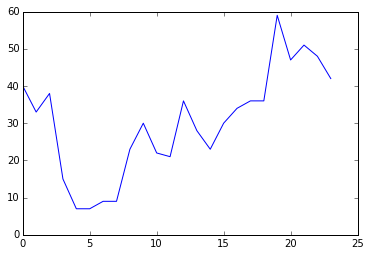

In [304]:
plt.plot(xrange(0, 24), test_block_quarter.groupby('hour').Datetime.count())

In [58]:
def acf_pacf(ts, lags):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(ts, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(ts, lags=lags, ax=ax2)

In [512]:
def plot_time_series(df, block, groupby='month'):
    tmp = df[df.block_group == block].copy()
    plt.figure(figsize=(30, 5))
    #plt.axvline(pd.to_datetime('2010-01-01'))
    #tmp[tmp.quality == 1].groupby(['year', groupby]).Idx.count().plot()
    tmp[tmp.violent == 1].groupby(['year', groupby]).Idx.count().plot()
    #tmp[tmp.nonviolent == 1].groupby(['year', groupby]).Idx.count().plot()
    #tmp[tmp.car_break_in == 1].groupby(['year', groupby]).Idx.count().plot()
    #tmp[tmp.car_theft == 1].groupby(['year', groupby]).Idx.count().plot()
    
    #count doesn't include zeros
    #need labels
    #bars on years

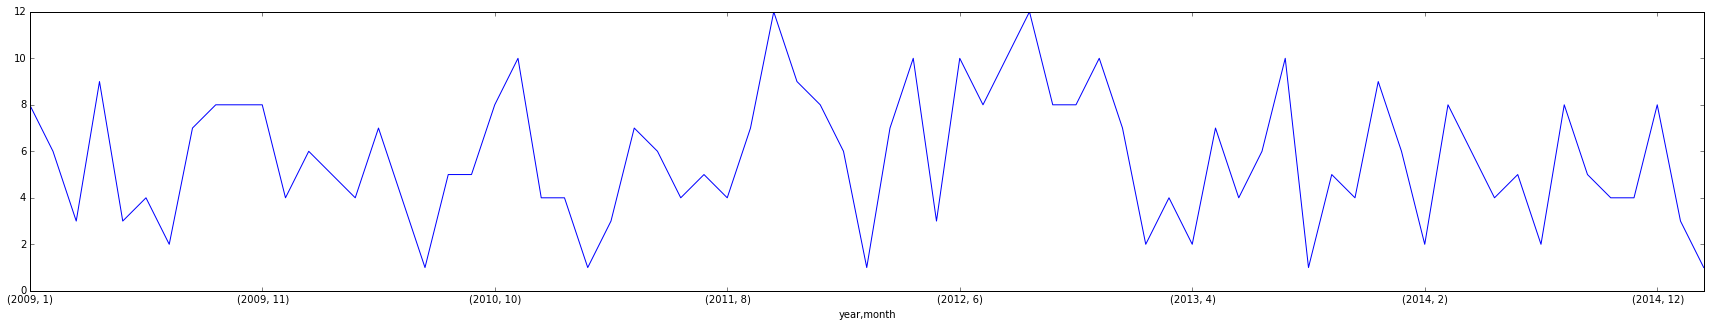

In [513]:
plot_time_series(cdf, 23123)

In [434]:
#deseasonalize. for each year, is there a trend?